##### Copyright 2019 The TensorFlow Authors.

import tensorflow as tf
print("TensorFlow version:", tf.__version__)


In [6]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [8]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8594 - loss: 0.4851
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9580 - loss: 0.1472
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9667 - loss: 0.1070
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9738 - loss: 0.0870
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9781 - loss: 0.0725
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0839


[0.07206913083791733, 0.9776999950408936]

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [9]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [13]:
tf.nn.softmax(predictions).numpy()

NameError: name 'predictions' is not defined

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [15]:
loss_fn(y_train[:1], predictions).numpy()

NameError: name 'predictions' is not defined

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 定义参数
kind_num = 2
col_num = 10
row_num = 10
image_size = 24  # 调整后的图像大小
ratio_of_train_set = 0.9

# 图像文件名
dataset_file_name = 'Picture.jpg'

# 每个种类的行数
kind_row = int(row_num / kind_num)

# 每个种类的样本数
sample_num = int(col_num * kind_row)  # 每个种类的样本数

# 训练和测试样本数
train_num = int(sample_num * ratio_of_train_set)
test_num = sample_num - train_num

# 读取图像文件
raw_image = cv2.imread(dataset_file_name)

# 检查是否成功读取图像
if raw_image is None:
    print(f"无法读取文件 {dataset_file_name}，请确保它是有效的图像文件。")
else:
    # 转换为灰度图像
    raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)

    # 计算每个符号的大小
    pic_height, pic_width = raw_image.shape
    block_height = int(pic_height / row_num)
    block_width = int(pic_width / col_num)

    # 准备每个符号的图像数组
    img_array = []
    for n in range(kind_num):
        img_symbol = []
        for i in range(kind_row):
            for j in range(col_num):
                # 从原始图像中裁剪符号
                image = raw_image[
                    ((n * kind_row) + i) * block_height:((n * kind_row) + i + 1) * block_height,
                    j * block_width: (j + 1) * block_width
                ]
                # 缩放图像到 (image_size x image_size)
                down_points = (image_size, image_size)
                image = cv2.resize(image, down_points, interpolation=cv2.INTER_LINEAR)
                # 将像素值缩放到 0 到 1 的范围
                image = image.astype('float32') / 255.0
                img_symbol.append(image)
        img_array.append(img_symbol)

    # 显示原始图像
    fig, ax = plt.subplots()
    ax.imshow(raw_image, cmap='gray')
    plt.title('Original Gray Image')
    plt.show()

    # 分割 img_array 到训练集和测试集
    x_train, x_test = [], []
    y_train, y_test = []

    for i in range(kind_num):
        # 将第 i+1 类的样本添加到训练集
        x_train += img_array[i][:train_num]
        # 将第 i+1 类的样本添加到测试集
        x_test += img_array[i][train_num:]
        # 将分类结果添加到输出集
        y_train += [i for j in range(train_num)]
        y_test += [i for j in range(test_num)]

    # 将列表转换为 NumPy 数组，以便神经网络模型训练
    x_train, x_test = np.array(x_train), np.array(x_test)
    y_train, y_test = np.array(y_train), np.array(y_test)

    # 打印数据集的形状
    print("x_train shape:", x_train.shape)
    print("y_train shape:", y_train.shape)
    print("x_test shape:", x_test.shape)
    print("y_test shape:", y_test.shape)

无法读取文件 Picture.jpg，请确保它是有效的图像文件。


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 定义参数
kind_num = 2
col_num = 10
row_num = 10
image_size = 24  # 调整后的图像大小
ratio_of_train_set = 0.9

# 图像文件名
dataset_file_name = 'Picture.jpg'

# 每个种类的行数
kind_row = int(row_num / kind_num)

# 每个种类的样本数
sample_num = int(col_num * kind_row)  # 每个种类的样本数

# 训练和测试样本数
train_num = int(sample_num * ratio_of_train_set)
test_num = sample_num - train_num

# 读取图像文件
raw_image = cv2.imread(dataset_file_name)

# 检查是否成功读取图像
if raw_image is None:
    print(f"无法读取文件 {dataset_file_name}，请确保它是有效的图像文件。")
else:
    # 转换为灰度图像
    raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)

    # 计算每个符号的大小
    pic_height, pic_width = raw_image.shape
    block_height = int(pic_height / row_num)
    block_width = int(pic_width / col_num)

    # 准备每个符号的图像数组
    img_array = []
    for n in range(kind_num):
        img_symbol = []
        for i in range(kind_row):
            for j in range(col_num):
                # 从原始图像中裁剪符号
                image = raw_image[
                    ((n * kind_row) + i) * block_height:((n * kind_row) + i + 1) * block_height,
                    j * block_width: (j + 1) * block_width
                ]
                # 缩放图像到 (image_size x image_size)
                down_points = (image_size, image_size)
                image = cv2.resize(image, down_points, interpolation=cv2.INTER_LINEAR)
                # 将像素值缩放到 0 到 1 的范围
                image = image.astype('float32') / 255.0
                img_symbol.append(image)
        img_array.append(img_symbol)

    # 显示原始图像
    fig, ax = plt.subplots()
    ax.imshow(raw_image, cmap='gray')
    plt.title('Original Gray Image')
    plt.show()

    # 分割 img_array 到训练集和测试集
    x_train, x_test = [], []
    y_train, y_test = []

    for i in range(kind_num):
        # 将第 i+1 类的样本添加到训练集
        x_train += img_array[i][:train_num]
        # 将第 i+1 类的样本添加到测试集
        x_test += img_array[i][train_num:]
        # 将分类结果添加到输出集
        y_train += [i for j in range(train_num)]
        y_test += [i for j in range(test_num)]

    # 将列表转换为 NumPy 数组，以便神经网络模型训练
    x_train, x_test = np.array(x_train), np.array(x_test)
    y_train, y_test = np.array(y_train), np.array(y_test)

    # 打印数据集的形状
    print("x_train shape:", x_train.shape)
    print("y_train shape:", y_train.shape)
    print("x_test shape:", x_test.shape)
    print("y_test shape:", y_test.shape)

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [17]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8567 - loss: 0.4934
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9549 - loss: 0.1556
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9658 - loss: 0.1135
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9721 - loss: 0.0887
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9756 - loss: 0.0780


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [18]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9768 - loss: 0.0720


[0.07199696451425552, 0.9768000245094299]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

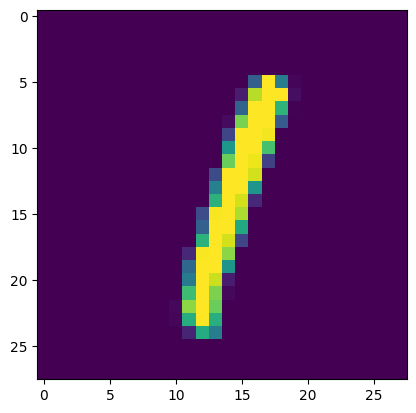

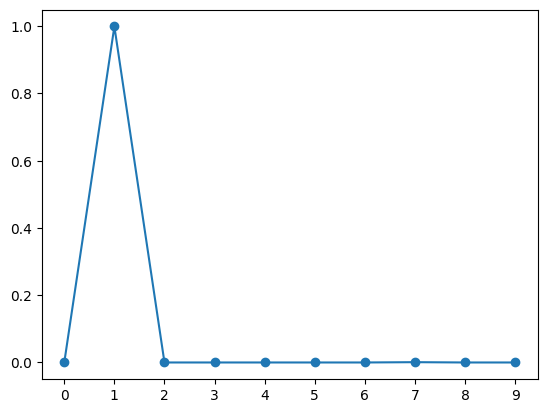

In [23]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
import matplotlib.pyplot as plt
n = 6
fig, ax = plt.subplots()
ax.imshow(x_test[n-1])
plt.show()
fig, ax = plt.subplots()
ax.plot(range(10), probability_model(x_test[n-1:n])[0], '-o')
ax.set_xticks(range(10))
plt.show()

In [20]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.7403318e-07, 5.0521933e-08, 3.2982903e-06, 1.3474336e-04,
        2.2753620e-11, 5.2135692e-07, 1.5237115e-12, 9.9983716e-01,
        1.3650137e-07, 2.3962177e-05],
       [2.2577751e-09, 9.0754009e-05, 9.9990833e-01, 1.4388252e-07,
        1.9469979e-18, 1.6320998e-07, 3.0114393e-07, 6.3560198e-13,
        2.5928782e-07, 5.8117588e-16],
       [7.6834958e-08, 9.9920964e-01, 1.1867038e-04, 1.1567523e-06,
        1.1375127e-04, 8.8526367e-06, 2.3242877e-05, 5.0031592e-04,
        2.3994457e-05, 2.4883965e-07],
       [9.9976665e-01, 3.1539930e-08, 6.3181615e-05, 2.0545967e-06,
        2.4463233e-07, 1.5011043e-05, 8.3190731e-05, 4.6287958e-05,
        9.7351403e-07, 2.2375456e-05],
       [2.1512606e-07, 1.2616265e-09, 1.3639746e-05, 1.2532431e-07,
        9.9890542e-01, 5.7306117e-08, 4.3638812e-07, 3.7928396e-06,
        1.5885920e-06, 1.0747261e-03]], dtype=float32)>

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
